# Diabetes Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
print (df.isnull().values.any())

False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


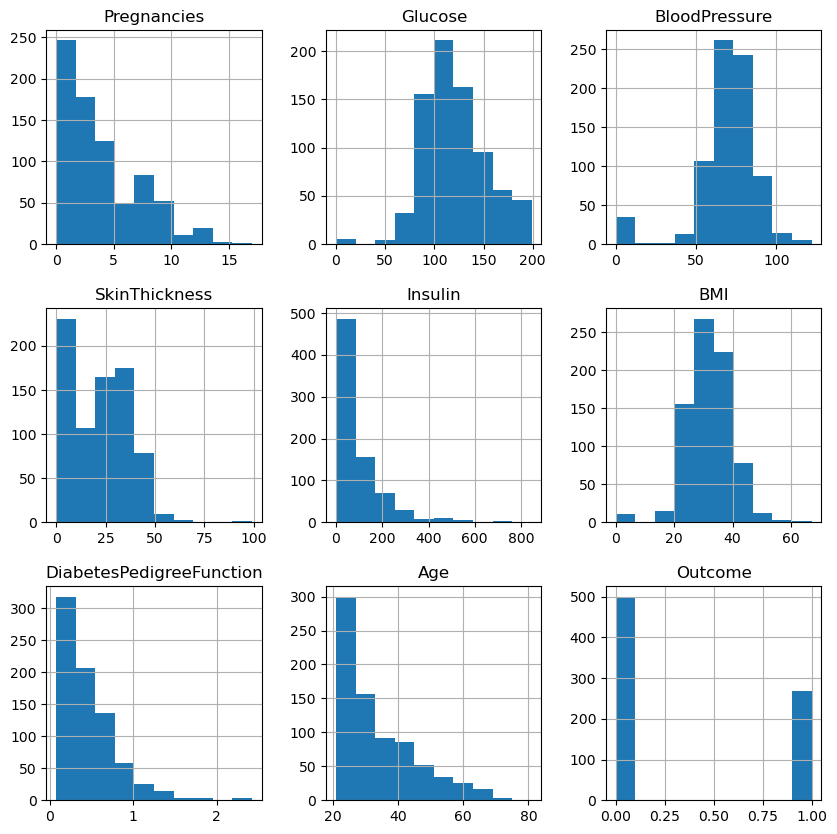

In [6]:
# Histogram
df.hist(bins=10,figsize=(10,10))
plt.show()

In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [10]:
# Splitting train test data 80:20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer, roc_auc_score
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

# Scoring dictionary for cross-validation
scoring = {'accuracy': make_scorer(accuracy_score),
           'roc_auc': make_scorer(roc_auc_score),
           'tn': make_scorer(tn),
           'fp': make_scorer(fp),
           'fn': make_scorer(fn),
           'tp': make_scorer(tp)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

# 1. Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, Y_train)

# Prediction and evaluation
y_pred = clf.predict(X_test)
ac = accuracy_score(Y_test, y_pred)
rc = roc_auc_score(Y_test, y_pred)

print("Accuracy {0} \nROC {1}".format(ac,rc))

# Cross-validation
result = cross_validate(clf, X_train, Y_train, scoring=scoring, cv=10)
display_result(result)

# Display predicted values
df_predictions = pd.DataFrame(data={'Actual': Y_test, 'Predicted': y_pred})
print(df_predictions)

Accuracy 0.7272727272727273 
ROC 0.6828282828282828
TP:  [14 17  8 12  8  9 12 15 11 15]
TN:  [33 35 36 37 34 38 37 33 37 36]
FN:  [ 8  5 14  9 13 12  9  6 10  6]
FP:  [7 5 4 4 6 2 3 7 3 4]
     Actual  Predicted
575       0          0
143       1          0
303       1          1
15        1          0
428       0          0
..      ...        ...
666       1          1
620       0          0
230       1          1
763       0          0
504       0          0

[154 rows x 2 columns]


# 2. Support Vector Machine

In [13]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X_train, Y_train)

# Prediction and evaluation
y_pred = clf.predict(X_test)
ac = accuracy_score(Y_test, y_pred)
rc = roc_auc_score(Y_test, y_pred)

print("Accuracy {0} \nROC {1}".format(ac,rc))

# Cross-validation
result = cross_validate(clf, X_train, Y_train, scoring=scoring, cv=10)
display_result(result)

# Display predicted values
df_predictions = pd.DataFrame(data={'Actual': Y_test, 'Predicted': y_pred})
print(df_predictions)

Accuracy 0.7337662337662337 
ROC 0.6919191919191918
TP:  [14 16  8 11  8  9 12 15 13 15]
TN:  [33 36 36 37 35 38 38 32 37 35]
FN:  [ 8  6 14 10 13 12  9  6  8  6]
FP:  [7 4 4 4 5 2 2 8 3 5]
     Actual  Predicted
575       0          0
143       1          0
303       1          1
15        1          0
428       0          0
..      ...        ...
666       1          1
620       0          0
230       1          1
763       0          0
504       0          0

[154 rows x 2 columns]


# 3. Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

# Prediction and evaluation
y_pred = clf.predict(X_test)
ac = accuracy_score(Y_test, y_pred)
rc = roc_auc_score(Y_test, y_pred)

print("Accuracy {0} \nROC {1}".format(ac,rc))

# Cross-validation
result = cross_validate(clf, X_train, Y_train, scoring=scoring, cv=10)
display_result(result)

# Display predicted values
df_predictions = pd.DataFrame(data={'Actual': Y_test, 'Predicted': y_pred})
print(df_predictions)

Accuracy 0.7662337662337663 
ROC 0.7333333333333334
TP:  [13 14 12 12  8 10 13 14 12 14]
TN:  [32 34 31 36 31 38 36 34 34 35]
FN:  [ 9  8 10  9 13 11  8  7  9  7]
FP:  [8 6 9 5 9 2 4 6 6 5]
     Actual  Predicted
575       0          0
143       1          0
303       1          0
15        1          0
428       0          1
..      ...        ...
666       1          0
620       0          0
230       1          1
763       0          1
504       0          0

[154 rows x 2 columns]


In [15]:
Pregnancies = int(input("Enter the number of pregnancies: "))
Glucose = int(input("Enter the glucose level: "))
BloodPressure = int(input("Enter the blood pressure: "))
SkinThickness = int(input("Enter the skin thickness: "))
Insulin = int(input("Enter the insulin level: "))
BMI = float(input("Enter the BMI: "))
DiabetesPedigreeFunction = float(input("Enter the Diabetes Pedigree Function: "))
Age = int(input("Enter the age: "))

user_data = [[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]]

y_pred = clf.predict(user_data)

if y_pred[0] == 0:
    print("The person is predicted to be not diabetic.")
else:
    print("The person is predicted to be diabetic.")

Enter the number of pregnancies: 1
Enter the glucose level: 85
Enter the blood pressure: 66
Enter the skin thickness: 29
Enter the insulin level: 0
Enter the BMI: 26.6
Enter the Diabetes Pedigree Function: 0.351
Enter the age: 31
The person is predicted to be not diabetic.


C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
